In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as mc

In [2]:
df = pd.read_csv('df_master.csv', index_col = 0)

/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info

<bound method DataFrame.info of             player_name      school conference  GP  Min_per   ORtg   usg  \
3         DeAndrae Ross        Troy         SB   7     11.5   67.1  16.9   
6         Pooh Williams    Utah St.        WAC  32     64.0  108.3  18.1   
7         Pooh Williams    Utah St.        WAC  33     64.5  105.6  18.7   
20         Nick Rodgers      Butler       Horz  11      1.0  121.1  16.8   
24           Dana Smith    Longwood        ind  27     81.8   99.8  27.7   
...                 ...         ...        ...  ..      ...    ...   ...   
56676    Darius Garland  Vanderbilt        SEC   5     10.8  110.1  26.9   
56951    Keldon Johnson    Kentucky        SEC  37     76.2  112.9  21.7   
57563       Tyler Herro    Kentucky        SEC  37     81.0  118.2  20.0   
57747      Jaxson Hayes       Texas        B12  32     50.0  133.8  16.9   
57908  Kevin Porter Jr.         USC        P12  21     34.6   98.4  22.8   

        eFG  TS_per  ORB_per  ...    treb     ast     s

In [4]:
df['year'].unique()

array([2011, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
sum(df.groupby('pid')['pid'].nunique())

22252

In [6]:
num_yr = []

for i in df['year'].unique():
    num_yr.append(df[df['year']==i]['pid'].nunique())

In [7]:
num_yr

[4548, 4697, 4585, 4607, 4721, 4724, 4696, 4743, 4703, 4738, 4733]

In [8]:
sum(df[df['year']==2010]['pos'].isna())

32

In [9]:
df.columns

Index(['player_name', 'school', 'conference', 'GP', 'Min_per', 'ORtg', 'usg',
       'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM',
       'FTA', 'FT_per', '2PM', '2PA', '2P_per', '3PM', '3PA', '3P_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'rec-rk', 'ast/tov', 'rimmade',
       'rimmade + rimmiss', 'midmade', 'midmade + midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+mismiss)', 'dunksmade',
       'dunksmiss + dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'pos', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg'],
      dtype='object')

In [10]:
df['conference'].unique()

array(['SB', 'WAC', 'Horz', 'ind', 'A10', 'BE', 'AE', 'MAAC', 'Pat',
       'SWAC', 'CAA', 'MAC', 'ACC', 'SEC', 'B12', 'MEAC', 'MVC', 'BW',
       'NEC', 'Slnd', 'SC', 'Ivy', 'CUSA', 'B10', 'P10', 'MWC', 'ASun',
       'BSky', 'OVC', 'BSth', 'Sum', 'WCC', 'GWC', 'P12', 'Amer', 'Ind'],
      dtype=object)

In [5]:
#add FT per game statistics
df['FTM_pg'] = df['FTM'] / df['GP']
df['FTA_pg'] = df['FTA'] / df['GP']

In [6]:
#offensive stats
off_stats = ['pts', '2PA_pg', '2PM_pg','2P_per','3PA_pg', '3PM_pg','3P_per','ast','ftr','FTM_pg', 'FTA_pg', 'FT_per']
off_stats2 = ['pts', '2PA_pg', '2PM_pg','3PA_pg', '3PM_pg','ast','ftr','FTM_pg', 'FTA_pg']
def_stats = ['oreb', 'dreb', 'treb', 'stl', 'blk']
adv_stats = ['bpm', 'ORtg', 'eFG', 'usg', 'TO_per']
fun_stats = ['dunksmade','dunksmiss + dunksmade', 'dunksmade/(dunksmade+dunksmiss)']
t_stats = ['pos','pts', '2PA_pg', '2PM_pg','3PA_pg', '3PM_pg','ast','ftr','FTM_pg', 'FTA_pg', 'oreb', 'dreb', 'treb', 'stl', 'blk','bpm', 'ORtg', 'eFG', 'usg', 'TO_per']

In [29]:
df_draft['pos'].unique()

array(['Scoring PG', 'C', 'Wing F', 'Combo G', 'PF/C', 'Pure PG',
       'Stretch 4', 'Wing G'], dtype=object)

In [30]:
pos_order = ['Pure PG','Scoring PG','Combo G','Wing G','Wing F','Stretch 4', 'PF/C','C']

In [7]:
df[t_stats].head()

,pos,pts,2PA_pg,2PM_pg,3PA_pg,3PM_pg,ast,ftr,FTM_pg,FTA_pg,oreb,dreb,treb,stl,blk,bpm,ORtg,eFG,usg,TO_per
3,Wing G,3.2857,1.571429,0.571429,2.571429,0.571429,1.4286,20.7,0.428571,0.857143,0.5714,1.1429,1.7143,0.1429,0.0000,-10.394000,67.1,34.5,16.9,32.8
6,Combo G,8.7812,4.187500,2.187500,3.125000,1.125000,2.1875,26.5,1.031250,1.937500,0.4688,1.3750,1.8438,0.5938,0.2188,2.282520,108.3,53.0,18.1,14.1
7,Combo G,8.6667,3.303030,1.303030,4.030303,1.484848,2.0909,26.9,1.606061,1.969697,0.1515,1.4848,1.6364,0.2121,0.0909,1.125160,105.6,48.1,18.7,16.7
20,Pure PG,0.5455,0.090909,0.000000,0.272727,0.181818,0.0909,0.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,-3.892090,121.1,75.0,16.8,24.8
24,Wing F,17.5556,9.666667,4.666667,3.370370,1.222222,2.4074,53.1,4.555556,6.925926,2.1481,4.9259,7.0741,0.8148,0.4815,-0.441037,99.8,49.9,27.7,18.6


In [8]:
#only drafted players
df_draft = df[df['pick']!=0]

In [14]:
#
50/4700

0.010638297872340425

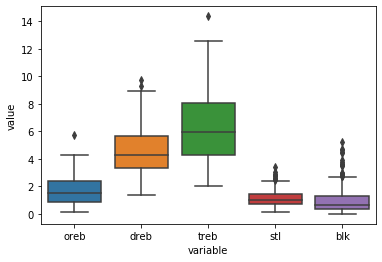

In [15]:
sns.boxplot(x='variable', y='value', data=pd.melt(df_draft[def_stats]))

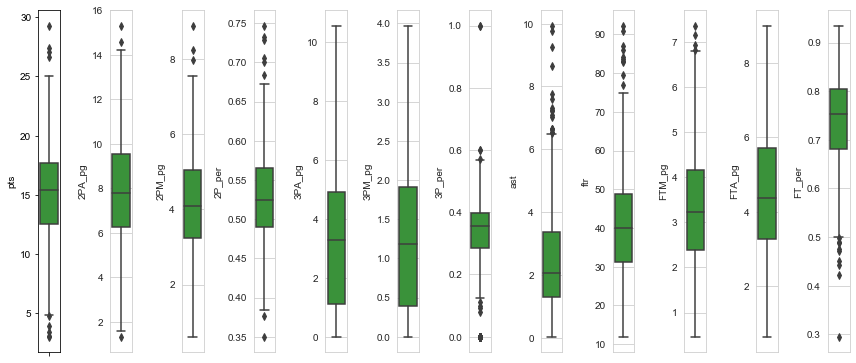

In [16]:
#offensive stats box plot

l = df_draft[off_stats].columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_draft[off_stats[i]],color='C2',orient='v')
    plt.tight_layout()

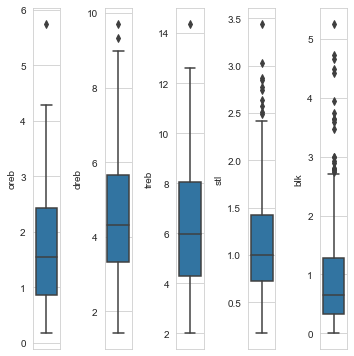

In [17]:
#defensive stats box plot

l = df_draft[def_stats].columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_draft[def_stats[i]],color='C0',orient='v')
    plt.tight_layout()

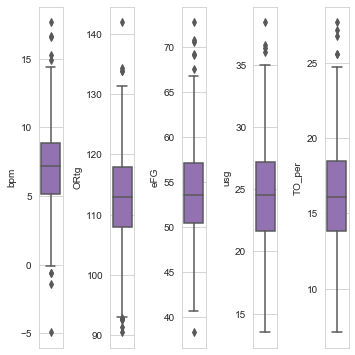

In [18]:
#adv stats boxplot

l = df_draft[adv_stats].columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_draft[adv_stats[i]],color='C4',orient='v')
    plt.tight_layout()

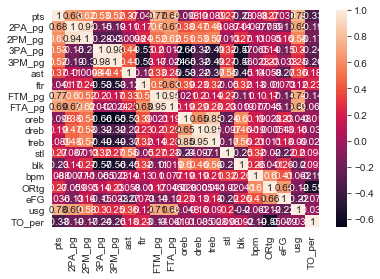

In [53]:
heatmap =df_draft[t_stats].corr()
sns.heatmap(heatmap, annot=True)
plt.show()

In [46]:
len(t_stats)

21

In [59]:
df_draft['pos'].unique()

array(['Scoring PG', 'C', 'Wing F', 'Combo G', 'PF/C', 'Pure PG',
       'Stretch 4', 'Wing G'], dtype=object)

In [ ]:
for i in df_draft['pos'].unique():
    #df_draft[df_draft['pos']==i].corr()
    sns.heatmap(df_draft[df_draft['pos']==i].corr(), annot=True)
    plt.show()

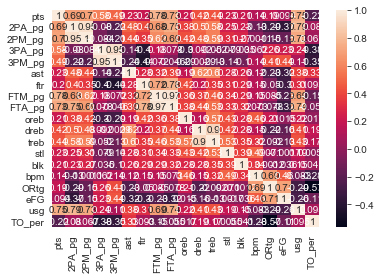

In [66]:
sns.heatmap(df_draft[df_draft['pos']=='Wing G'][t_stats].corr(), annot=True)
plt.show()

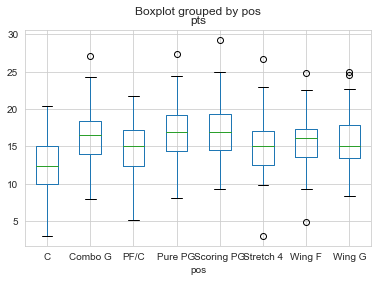

In [68]:
df_draft.boxplot('pts', by='pos')

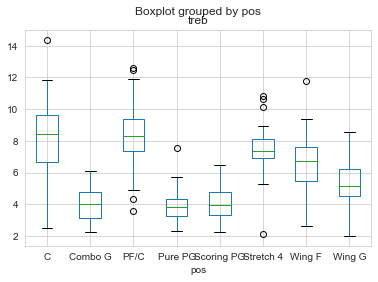

In [79]:
df_draft.boxplot('treb', by='pos')

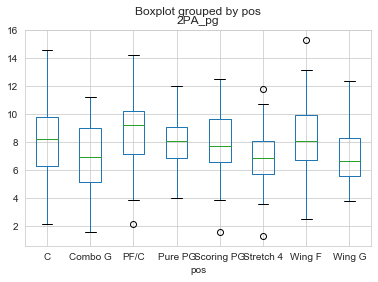

In [80]:
df_draft.boxplot('2PA_pg', by='pos')

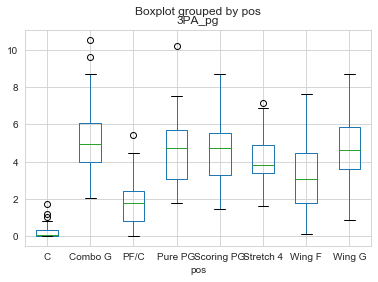

In [81]:
df_draft.boxplot('3PA_pg', by='pos')

In [84]:
df_draft['pos'].unique()

array(['Scoring PG', 'C', 'Wing F', 'Combo G', 'PF/C', 'Pure PG',
       'Stretch 4', 'Wing G'], dtype=object)

In [105]:
df_draft[df_draft['pos']=='C'].pts

178      11.5676
372       6.7742
634      10.0294
1489     11.2778
1628     10.4412
          ...   
54274    12.9000
54542    16.8750
55216    13.5882
55295     5.8571
57747    10.0000
Name: pts, Length: 88, dtype: float64

In [118]:
stats.f_oneway(df_draft[df_draft['pos']=='Pure PG'].pts, df_draft[df_draft['pos']=='Scoring PG'].pts, df_draft[df_draft['pos']=='Combo G'].pts,
              df_draft[df_draft['pos']=='Wing G'].pts, df_draft[df_draft['pos']=='Wing F'].pts, df_draft[df_draft['pos']=='Stretch 4'].pts,
              df_draft[df_draft['pos']=='PF/C'].pts, df_draft[df_draft['pos']=='C'].pts)

F_onewayResult(statistic=12.183009628871497, pvalue=2.232688398287547e-14)

In [11]:
anova_t = {}
for i in t_stats[1:]:
    anova_t[i] = stats.f_oneway(df_draft[df_draft['pos']=='Pure PG'][i], df_draft[df_draft['pos']=='Scoring PG'][i], df_draft[df_draft['pos']=='Combo G'][i],
              df_draft[df_draft['pos']=='Wing G'][i], df_draft[df_draft['pos']=='Wing F'][i], df_draft[df_draft['pos']=='Stretch 4'][i],
            df_draft[df_draft['pos']=='PF/C'][i], df_draft[df_draft['pos']=='C'][i])

In [12]:
anova_t

{'pts': F_onewayResult(statistic=12.183009628871497, pvalue=2.232688398287547e-14),
 '2PA_pg': F_onewayResult(statistic=5.097836368631824, pvalue=1.32309203780274e-05),
 '2PM_pg': F_onewayResult(statistic=9.378067572645996, pvalue=6.32834500209631e-11),
 '3PA_pg': F_onewayResult(statistic=102.25434143691888, pvalue=2.2169072485288854e-91),
 '3PM_pg': F_onewayResult(statistic=84.52946403056878, pvalue=5.726836422868024e-80),
 'ast': F_onewayResult(statistic=212.90529678263832, pvalue=1.2694710246553904e-143),
 'ftr': F_onewayResult(statistic=17.896793555404233, pvalue=3.493888753252571e-21),
 'FTM_pg': F_onewayResult(statistic=6.265859248346423, pvalue=4.742798778471519e-07),
 'FTA_pg': F_onewayResult(statistic=3.52798522304531, pvalue=0.00104553111487022),
 'oreb': F_onewayResult(statistic=122.40070668112378, pvalue=5.133285430903889e-103),
 'dreb': F_onewayResult(statistic=40.490766275632744, pvalue=7.697622191152729e-45),
 'treb': F_onewayResult(statistic=79.17623107198874, pvalue=2.

In [20]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df_draft['pts'], df_draft['pos'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,Combo G,4.1944,0.001,2.1624,6.2263,True
C,PF/C,2.4835,0.0012,0.6444,4.3226,True
C,Pure PG,4.8245,0.001,2.2315,7.4176,True
C,Scoring PG,4.947,0.001,3.0208,6.8732,True
C,Stretch 4,2.9026,0.0034,0.6043,5.2009,True
C,Wing F,3.4931,0.001,1.64,5.3463,True
C,Wing G,3.4459,0.001,1.6844,5.2073,True
Combo G,PF/C,-1.7108,0.2106,-3.8189,0.3972,False
Combo G,Pure PG,0.6302,0.9,-2.1601,3.4204,False
Combo G,Scoring PG,0.7527,0.9,-1.4318,2.9371,False


In [24]:
tukey_test = {}
for i in t_stats[1:]:
    comp = mc.MultiComparison(df_draft[i], df_draft['pos'])
    post_hoc_res = comp.tukeyhsd()
    tukey_test[i]= post_hoc_res.summary()

In [27]:
for i in t_stats[1:]:
    print(i, tukey_test[i])

pts     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
         C    Combo G   4.1944  0.001  2.1624 6.2263   True
         C       PF/C   2.4835 0.0012  0.6444 4.3226   True
         C    Pure PG   4.8245  0.001  2.2315 7.4176   True
         C Scoring PG    4.947  0.001  3.0208 6.8732   True
         C  Stretch 4   2.9026 0.0034  0.6043 5.2009   True
         C     Wing F   3.4931  0.001    1.64 5.3463   True
         C     Wing G   3.4459  0.001  1.6844 5.2073   True
   Combo G       PF/C  -1.7108 0.2106 -3.8189 0.3972  False
   Combo G    Pure PG   0.6302    0.9 -2.1601 3.4204  False
   Combo G Scoring PG   0.7527    0.9 -1.4318 2.9371  False
   Combo G  Stretch 4  -1.2917 0.7457 -3.8104  1.227  False
   Combo G     Wing F  -0.7012    0.9 -2.8216 1.4192  False
   Combo G     Wing G  -0.7485    0.9 -2.7892 1.2922  False
      PF/C    Pure PG    2.341 0.128

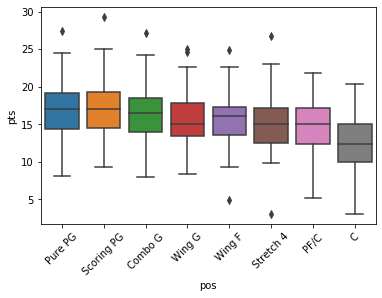

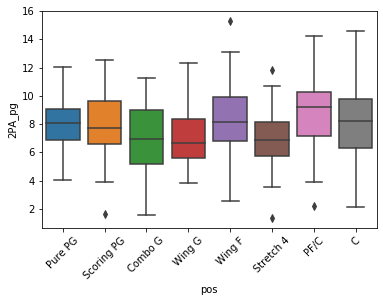

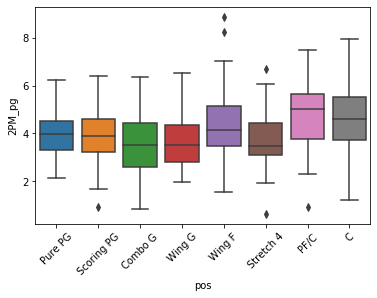

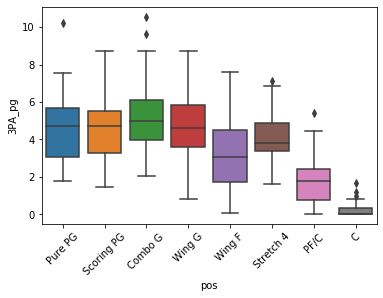

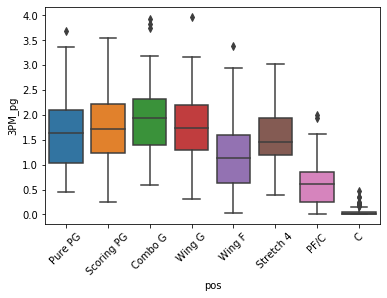

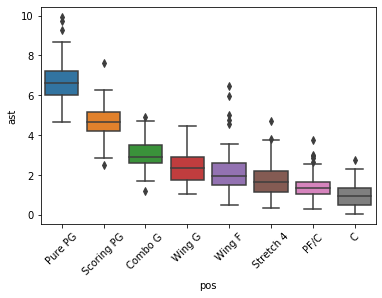

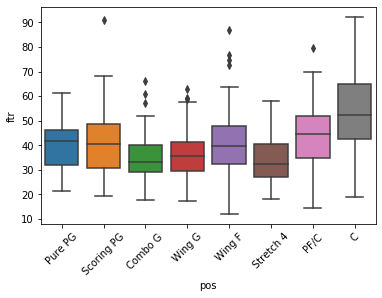

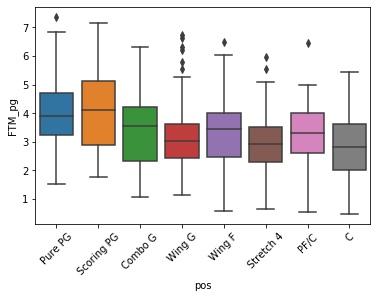

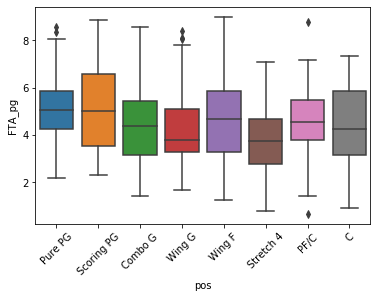

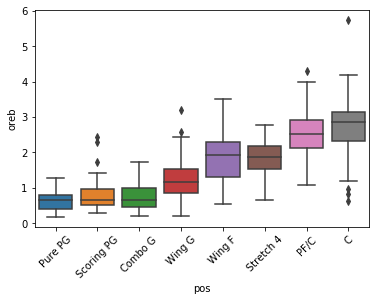

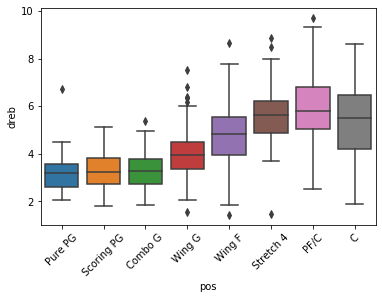

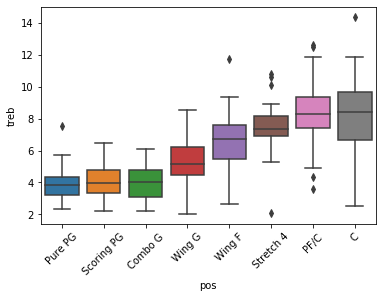

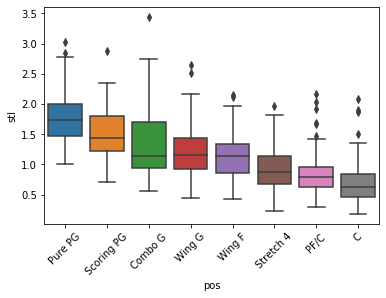

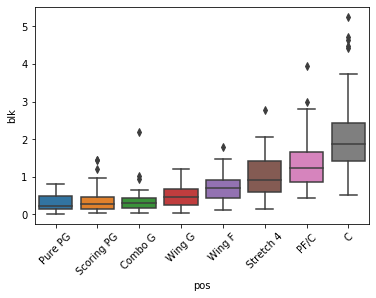

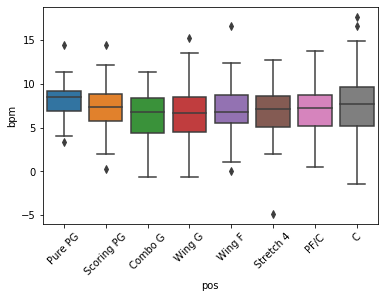

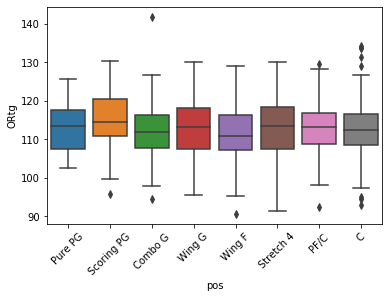

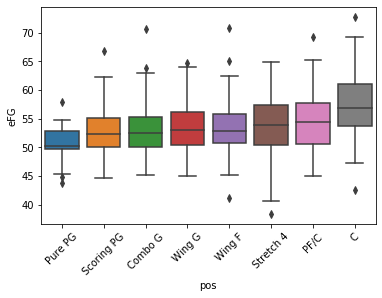

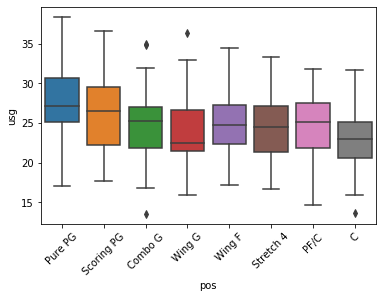

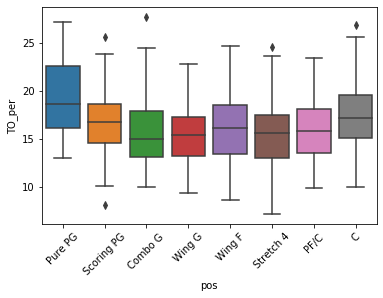

In [43]:
#boxplot by posiostions

for i in t_stats[1:]:
    plt.figure(i)
    sns.boxplot(x='pos', y=i, data=df_draft, order=pos_order).set_xticklabels(pos_order, rotation =45)

In [49]:
df_draft['ht']

116       6-3
178      6-10
372       6-8
380       6-8
384       6-2
         ... 
56676     6-2
56951     6-6
57563     6-5
57747    6-11
57908     6-6
Name: ht, Length: 494, dtype: object

In [54]:
ht_in = []

for i in df_draft['ht']:
    height = i.split('-')
    ft = int(height[0])
    inch = int(height[1])
    ht_in.append(ft*12+inch*2)

In [63]:
df_draft['ht_in'] = ht_in
df_draft['ht_in'] = df_draft['ht_in'].astype(float)

/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_draft['ht_in']

116      78.0
178      92.0
372      88.0
380      88.0
384      76.0
         ... 
56676    76.0
56951    84.0
57563    82.0
57747    94.0
57908    84.0
Name: ht_in, Length: 494, dtype: float64

[Text(0, 0, 'Pure PG'),
 Text(0, 0, 'Scoring PG'),
 Text(0, 0, 'Combo G'),
 Text(0, 0, 'Wing G'),
 Text(0, 0, 'Wing F'),
 Text(0, 0, 'Stretch 4'),
 Text(0, 0, 'PF/C'),
 Text(0, 0, 'C')]

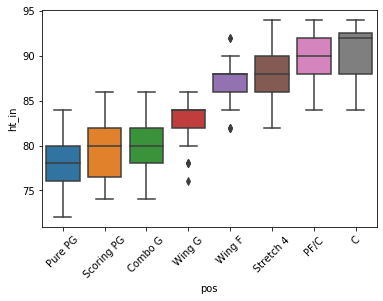

In [67]:
sns.boxplot(x='pos', y='ht_in', data=df_draft, order=pos_order).set_xticklabels(pos_order, rotation =45)

In [1]:
df_master

NameError: name 'df_master' is not defined